### Creating a CNN

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import pickle
import numpy as np
import matplotlib.pyplot as plt

#for reference
CATEGORIES = ['b_rook', 'b_knight', 'b_queen', 'w_king', 'b_king', 'w_queen', 'w_bishop', 'w_knight', 'b_bishop', 'w_rook', 'empty', 'b_pawn', 'w_pawn']

In [43]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

y = to_categorical(y) # Since loss="categorical_crossentropy" takes binary matrix as input rather than integers

In [44]:
print(len(X))
print(len(y))

896
896


In [45]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))  # Rectified linear activation
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))  # Rectified linear activation
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())           #As DenseLayer requires 1-D data
model.add(Dense(64))

model.add(Dense(13))
model.add(Activation("sigmoid"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fitting the data

In [46]:
model.fit(X, y, batch_size=8, epochs=10, validation_split=0.1)

Train on 806 samples, validate on 90 samples
Epoch 1/10
806/806 [==============================] - 1s 2ms/step - loss: 1.7118 - acc: 0.5050 - val_loss: 1.5281 - val_acc: 0.4778
Epoch 2/10
806/806 [==============================] - 1s 1ms/step - loss: 1.1580 - acc: 0.5906 - val_loss: 1.0902 - val_acc: 0.6556
Epoch 3/10
806/806 [==============================] - 1s 1ms/step - loss: 0.7133 - acc: 0.7630 - val_loss: 0.6111 - val_acc: 0.7889
Epoch 4/10
806/806 [==============================] - 1s 1ms/step - loss: 0.3904 - acc: 0.8797 - val_loss: 0.3711 - val_acc: 0.9111
Epoch 5/10
806/806 [==============================] - 1s 1ms/step - loss: 0.2615 - acc: 0.9194 - val_loss: 0.2834 - val_acc: 0.9000
Epoch 6/10
806/806 [==============================] - 1s 1ms/step - loss: 0.1534 - acc: 0.9578 - val_loss: 0.2183 - val_acc: 0.9333
Epoch 7/10
806/806 [==============================] - 1s 1ms/step - loss: 0.1193 - acc: 0.9640 - val_loss: 0.1362 - val_acc: 0.9556
Epoch 8/10
806/806 [===========

### Saving the model

In [47]:
model.save("piece_classifier.model")
#to load the model - model = tf.keras.model.load_model("piece_classifier.model")

In [48]:
predictions = model.predict([X])

In [49]:
print(predictions)

[[4.5096815e-13 1.9273053e-10 1.7020701e-11 ... 3.6202050e-09
  6.1710752e-09 7.2533083e-01]
 [8.7164394e-11 7.9785805e-09 2.4085034e-11 ... 3.8457864e-07
  1.8485377e-08 2.8465822e-04]
 [1.0616867e-04 7.4357152e-01 1.4533085e-04 ... 3.3665607e-08
  1.4943247e-07 7.4200523e-07]
 ...
 [2.1327680e-09 1.4789851e-10 6.8747584e-11 ... 5.2637694e-10
  9.4640978e-07 6.7030359e-04]
 [6.4086948e-05 5.8555179e-05 1.1379962e-05 ... 1.3521361e-01
  6.1623787e-04 3.5891029e-05]
 [1.3525971e-08 1.6742562e-12 6.2037671e-12 ... 1.4717052e-14
  4.8860695e-02 2.7118317e-06]]


In [50]:
print(np.argmax(predictions[0]))

12


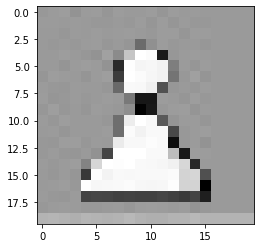

In [51]:
x = np.squeeze(X)
plt.imshow(x[0], cmap="gray")
plt.show() ##Correct !!!! refer CATEGORIES

### Checking accuracy and loss on test data

In [52]:
X_test = pickle.load(open("X_test.pickle", "rb"))
y_test = pickle.load(open("y_test.pickle", "rb"))

y_test = to_categorical(y_test)

In [53]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

448/448 [==============================] - 0s 314us/step
0.6002550146409443 0.890625
